# Performing EDA and Pre-processing on the Dataset

## Loading required packages

In [1]:
import pandas as pd
import json
import operator
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

## Preprocessing the data

In [2]:
DATA_DIR = "data/"

In [3]:
with open(DATA_DIR + "arxivData.json", "r") as fp:
    data = json.load(fp)

In [4]:
def str_to_list(x):
    """
        Converting string enclosed lists to a python list
    """
    for i in range(len(x)):
        x[i]["author"] = eval(x[i]["author"])
        # x[i]["link"] = eval(x[i]["link"])
        x[i]["tag"] = eval(x[i]["tag"])

In [5]:
str_to_list(data)

## Data Visualization

* Papers published per year

In [6]:
pap_year = {}
for i in range(len(data)):
    if data[i]['year'] not in pap_year:
        pap_year[data[i]['year']] = 0
    else:
        pap_year[data[i]['year']] += 1

In [7]:
sorted_ycount = sorted(pap_year.items(), key=operator.itemgetter(0), reverse=False)

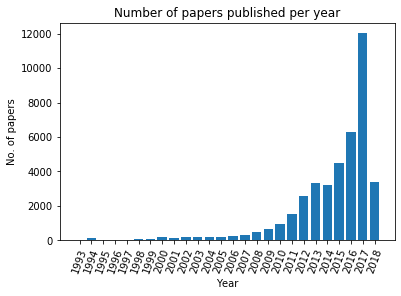

In [8]:
plt.bar(
    [str(x[0]) for x in sorted_ycount],
    [x[1] for x in sorted_ycount],
)
plt.xticks(rotation=70)
plt.title("Number of papers published per year")
plt.xlabel("Year")
plt.ylabel("No. of papers")
plt.show()

Year **2017** seems to have a boom in Computer Science papers published

* Let us see the top ten frequently occuring tags

In [9]:
tags = {}
for i in range(len(data)):
    for j in range(len(data[i]["tag"])):
        if data[i]["tag"][j]['term'] not in tags.keys():
            tags[data[i]["tag"][j]['term']] = 0
        else:
            tags[data[i]["tag"][j]['term']] += 1

In [10]:
sorted_tags = sorted(tags.items(), key=operator.itemgetter(1), reverse=True)
top_tags = sorted_tags[0:10].copy()
top_tags.reverse()

In [11]:
master_tags = {
    "cs.CV" : "Computer Vision and Pattern Recognition",
    "cs.LG" : "Machine Learning",
    "cs.AI" : "Artificial Intelligence",
    "stat.ML" : "Statistical Learning",
    "cs.CL" : "Computational Language",
    "cs.NE" : "Neural and Evolutionary Computing",
    "cs.IR" : "Information Retrieval",
    "math.OC" : "Optimization and Control",
    "cs.RO" : "Robotics",
    "cs.LO" : "Logic in Computer Science",
}

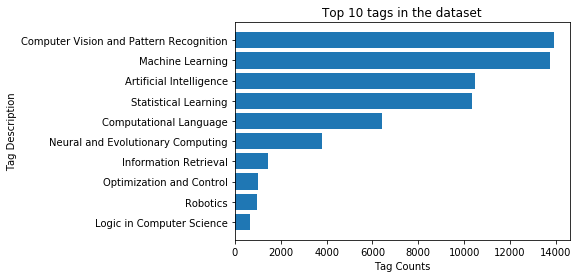

In [12]:
plt.barh(
    [master_tags[x[0]] for x in top_tags[0:10]],
    [x[1] for x in top_tags[0:10]],
)
plt.title("Top 10 tags in the dataset")
plt.xlabel("Tag Counts")
plt.ylabel("Tag Description")
plt.show()

* Let us see the top ten frequently occuring words in each paper's abstract

In [13]:
summaries = list(map(lambda x:x["summary"], data))
text_summ = ' '.join(summaries)

In [14]:
def preprocess_text(text):
    """
        Preprocess text data for performing analysis
    """
    # Converting all the letters to lowercase
    text = text.lower()
    # Removing numbers from the text
    text = re.sub(r'\d+', '', text)
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Removing trailing and leading whitespaces
    text = text.strip(' ')
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filt_sum = [w for w in word_tokens if not w in stop_words]
    
    return filt_sum

In [15]:
final_words = preprocess_text(text_summ)
fdist = nltk.FreqDist(final_words)

In [16]:
top_words = fdist.most_common(10)
top_words.reverse()

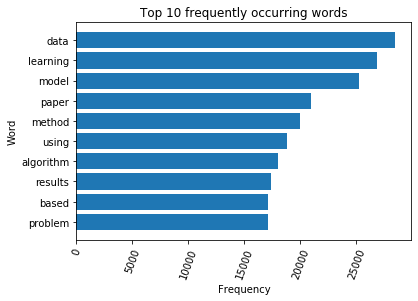

In [17]:
plt.barh(
    [x[0] for x in top_words],
    [x[1] for x in top_words],
)
plt.xticks(rotation=70)
plt.title("Top 10 frequently occurring words")
plt.ylabel("Word")
plt.xlabel("Frequency")
plt.show()